# Boston House Price Prediction using Linear Regression



Goal is to predict median home price (in thousands) in each neighboorhood.

Dataset: [boston housing dataset](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html). It consists of 506 neighboorhood regions around Boston in 1978 with 14 different features:

    CRIM - per capita crime rate by town

    ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

    INDUS - proportion of non-retail business acres per town.

    CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

    NOX - nitric oxides concentration (parts per 10 million)

    RM - average number of rooms per dwelling

    AGE - proportion of owner-occupied units built prior to 1940

    DIS - weighted distances to five Boston employment centres

    RAD - index of accessibility to radial highways

    TAX - full-value property-tax rate per $10,000

    PTRATIO - pupil-teacher ratio by town

    B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

    LSTAT - % lower status of the population

    MEDV - Median value of owner-occupied homes in $1000’s



In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
boston = load_boston()
#print(boston['DESCR']) #brief description of the dataset

In [3]:
boston_df = pd.DataFrame(boston['data'] )
boston_df.columns = boston['feature_names']
boston_df['PRICE']= boston['target']
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
# boston_df.columns = boston['feature_names']
# boston_df.head()

In [7]:
#Add the target as PRICE. 
boston_df['PRICE']= boston['target']
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
print(np.sum(np.isnan(boston_df)))

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


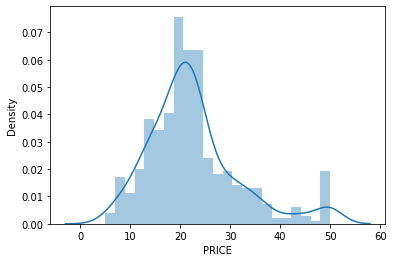

In [9]:
sns.distplot(boston_df['PRICE']);

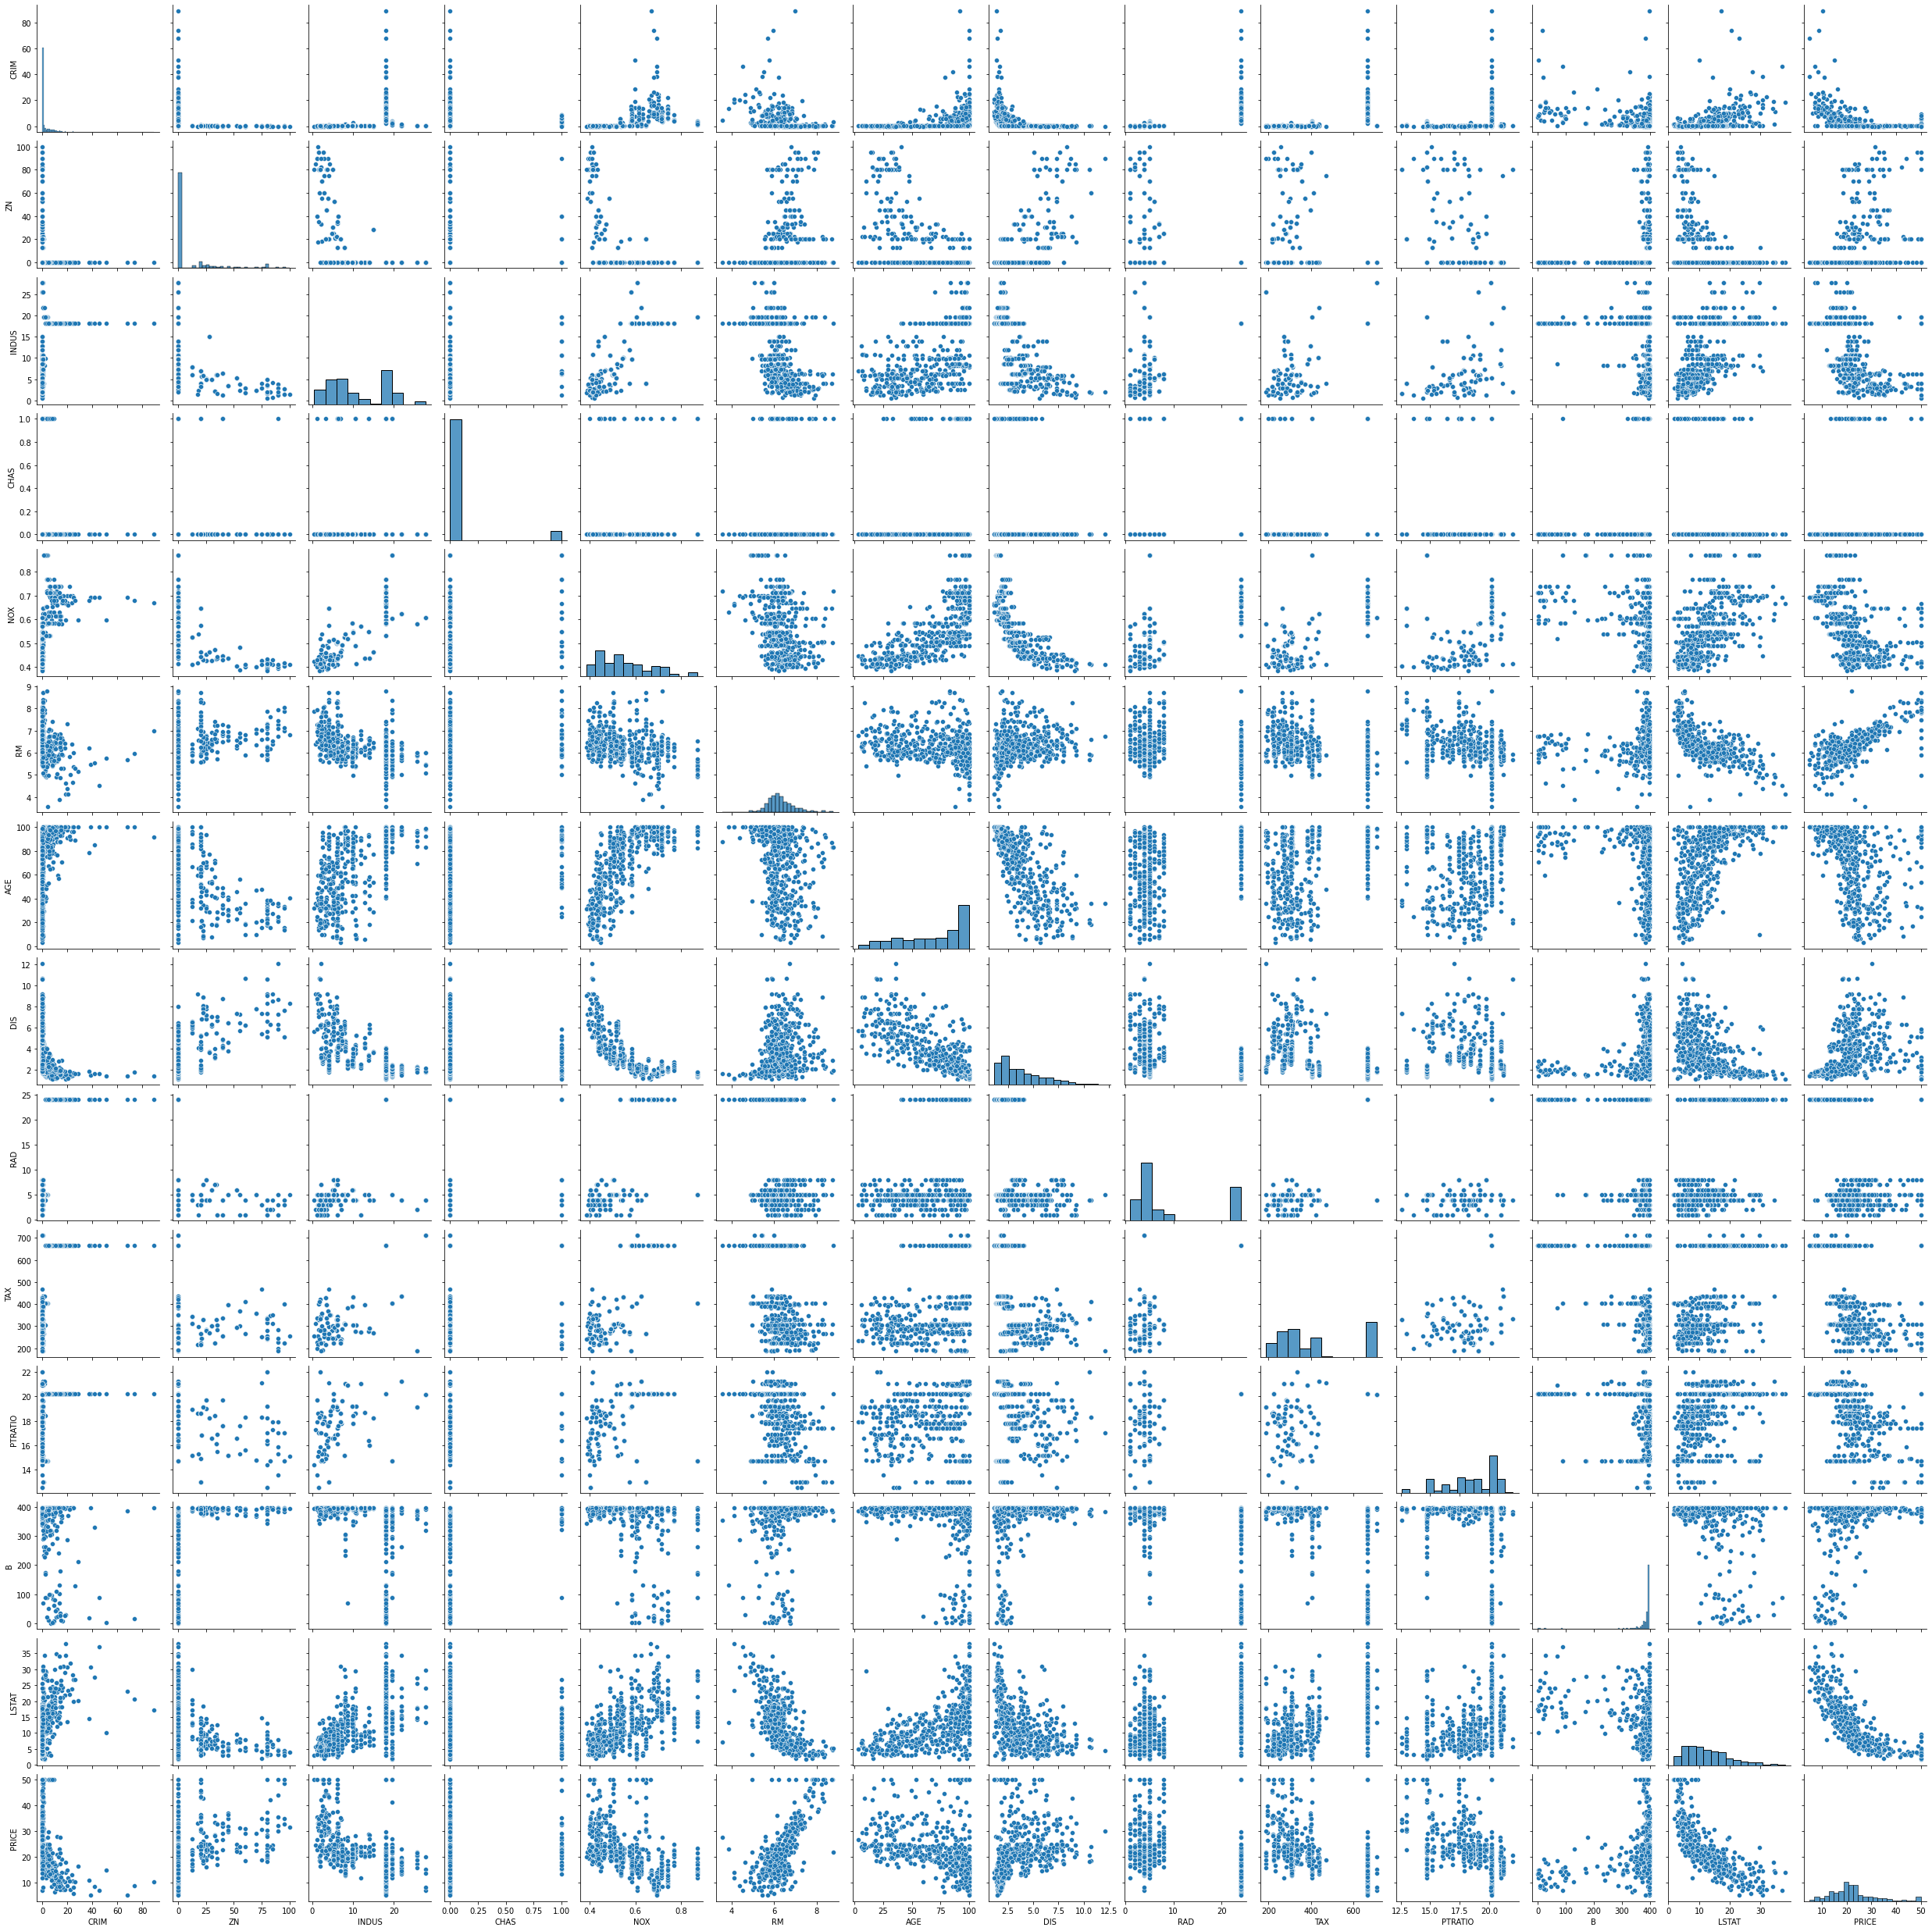

In [10]:
sns.pairplot(boston_df);

In [26]:

y = boston_df['PRICE']
#As we know, iloc is used to slice the array by index number. Here this is the matrix of 
#independent variables.
X = boston_df.iloc[:,0:13]

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(379, 13) (127, 13) (379,) (127,)


In [34]:

model = LinearRegression()
model.fit( X_train, y_train )


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
print('labels\n',X.columns)
print('Coefficients: \n', model.coef_)
print('Intercept: \n', model.intercept_)
print('R2 for Train)', model.score( X_train, y_train ))
print('R2 for Test (cross validation)', model.score(X_test, y_test))

labels
 Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')
Coefficients: 
 [-1.17735289e-01  4.40174969e-02 -5.76814314e-03  2.39341594e+00
 -1.55894211e+01  3.76896770e+00 -7.03517828e-03 -1.43495641e+00
  2.40081086e-01 -1.12972810e-02 -9.85546732e-01  8.44443453e-03
 -4.99116797e-01]
Intercept: 
 36.933255457118804
R2 for Train) 0.7697699488741149
R2 for Test (cross validation) 0.6354638433202133


In [14]:
#Alternately, we can show the results in a dataframe using the zip command.
pd.DataFrame( list(zip(X.columns, model.coef_)),
            columns=['features', 'estimatedCoeffs'])

,features,estimatedCoeffs
0,CRIM,-0.121310
1,ZN,0.044466
2,INDUS,0.011342
3,CHAS,2.511246
4,NOX,-16.231253
5,RM,3.859068
6,AGE,-0.009985
7,DIS,-1.500270
8,RAD,0.242143
9,TAX,-0.011072


In [19]:
y_pred = model.predict(X_test)
y_pred[0]

24.935707898576908

In [31]:
scores = cross_val_score(model, X_train, y_train, cv=10) 
print("R2:", scores, "\n R2_avg: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))



R2: [0.76859926 0.7654289  0.56835764 0.59959009 0.72498159 0.85232398
 0.45661566 0.83747062 0.80368503 0.79481354] 
 R2_avg: 0.72 (+/- 0.25)


In [22]:
boston_df['PRICE_REG']=model.predict(boston_df.iloc[:,0:13])
boston_df[['PRICE', 'PRICE_REG']].head()

,PRICE,PRICE_REG
0,24.0,30.290795
1,21.6,24.885615
2,34.7,30.471178
3,33.4,28.472236
4,36.2,27.811077


## Graph Outcomes
- Common to grapy predicted vs actual.
- Results should show a randomly distributed error function. 
- Note that there seem to be much larger errors on right side of grant, suggesting something else might be impacting highest values. 



Text(0.5, 1.0, 'Real vs Predicted Housing Prices')

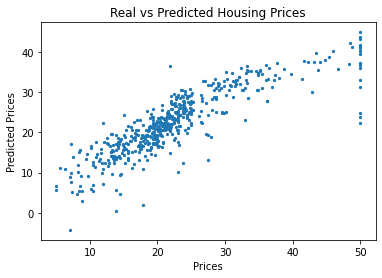

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter( boston_df['PRICE'], boston_df['PRICE_REG'], s=5 )
plt.xlabel( "Prices")
plt.ylabel( "Predicted Prices")
plt.title( "Real vs Predicted Housing Prices")

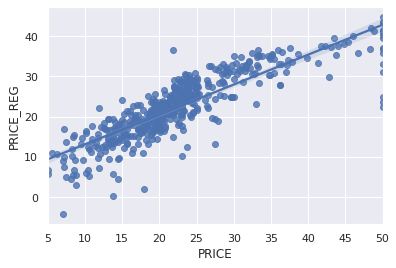

In [ ]:
#Let's make it look pretty with pickle
import seaborn as sns; sns.set(color_codes=True)
ax = sns.regplot(x="PRICE", y="PRICE_REG", data=boston_df[['PRICE','PRICE_REG']])

## Graph Residuals
- Common to graph predicted - actual (error term).
- Results should show a randomly distributed error function. 
- Here we are showing train and test as different 



Text(0, 0.5, 'Residuals')

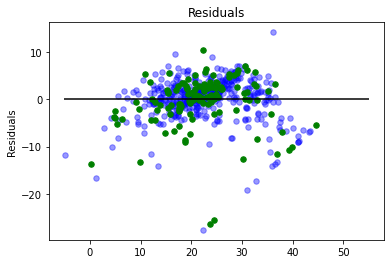

In [37]:
#
plt.scatter( model.predict(X_train), model.predict(X_train) - y_train,
           c ='b', s=30, alpha=0.4 )
plt.scatter( model.predict(X_test), model.predict(X_test) - y_test,
           c ='g', s=30 )
#The expected error is 0. 
plt.hlines( y=0, xmin=-5, xmax=55)
plt.title( "Residuals" )
plt.ylabel( "Residuals" )

## Persistent Models
- I could be that you would want to maintain 
- The `pickle` package enables storing objects to disk and then retreive them. 
- For example, for a trained model we might want to store it, and then use it to score additional data.


In [ ]:
#save the data
boston_df.to_csv('boston.csv')

In [ ]:
import pickle
pickle.dump( model, open( 'model_reg_boston.p', 'wb' ) )

In [ ]:
#Load the pickled object. 
lm_pickled = pickle.load( open( "lm_reg_boston.p", "rb" ) )

lm_pickled.score(X_train, y_train)

0.7645451026942549


Copyright [AnalyticsDojo](http://rpi.analyticsdojo.com) 2016.
This work is licensed under the [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0/) license agreement.


## KernelSHAP

In [39]:
!pip install shap

     |████████████████████████████████| 356 kB 28.5 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491645 sha256=5a8ded9ae5fdb9c4d6a7508309adeeb2722fa92f3411053b00bd204567df5236
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [40]:
import shap
shap.initjs()


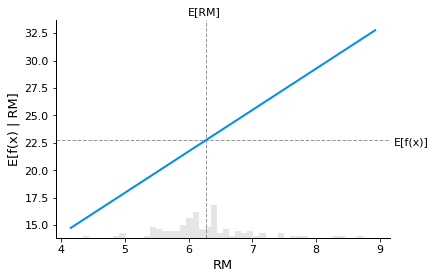

In [42]:
X100 = shap.utils.sample(X, 100)
shap.plots.partial_dependence(
    "RM", model.predict, X100, ice=False,
    model_expected_value=True, feature_expected_value=True
)

RM - average number of rooms per dwelling

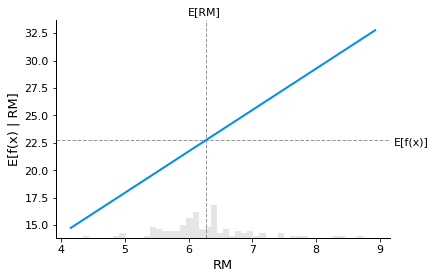

In [43]:
shap.plots.partial_dependence(
    "RM", model.predict, X100, ice=False,
    model_expected_value=True, feature_expected_value=True
)

In [44]:
explainer = shap.Explainer(model.predict, X100)
shap_values = explainer(X)

Permutation explainer: 507it [00:14, 35.34it/s]                         


SHAP values can be very complicated to compute (they are NP-hard in general), but linear models are so simple that we can read the SHAP values right off a partial dependence plot. When we are explaining a prediction , the SHAP value for a specific feature is just the difference between the expected model output and the partial dependence plot at the feature’s value :

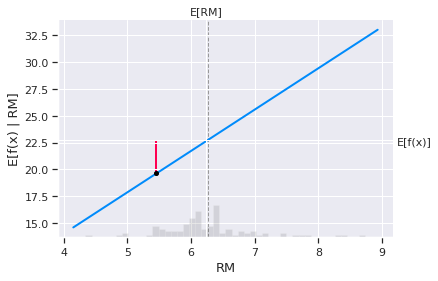

In [ ]:
# make a standard partial dependence plot
sample_ind = 18
shap.partial_dependence_plot(
    "RM", model.predict, X100, model_expected_value=True,
    feature_expected_value=True, ice=False,
    shap_values=shap_values[sample_ind:sample_ind+1,:]
)

In [ ]:
shap_values[sample_ind]

.values =
array([ 0.32637303, -0.55382933, -0.02702839, -0.15067479,  0.21409023,
       -3.13286859,  0.30671433,  0.00844202, -1.34873911,  1.04228159,
       -2.62681956, -0.51848337,  0.38676207])

.base_values =
22.743390308847246

.data =
array([  0.80271,   0.     ,   8.14   ,   0.     ,   0.538  ,   5.456  ,
        36.6    ,   3.7965 ,   4.     , 307.     ,  21.     , 288.99   ,
        11.69   ])

One the fundemental properties of Shapley values is that they always sum up to the difference between the game outcome when all players are present and the game outcome when no players are present.

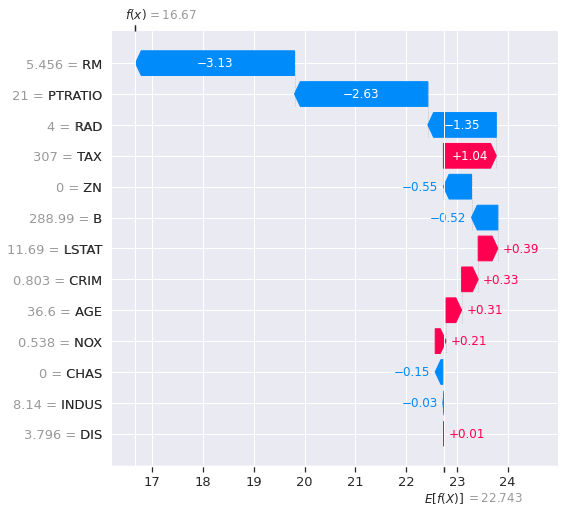

In [ ]:
shap.plots.waterfall(shap_values[sample_ind], max_display=14)

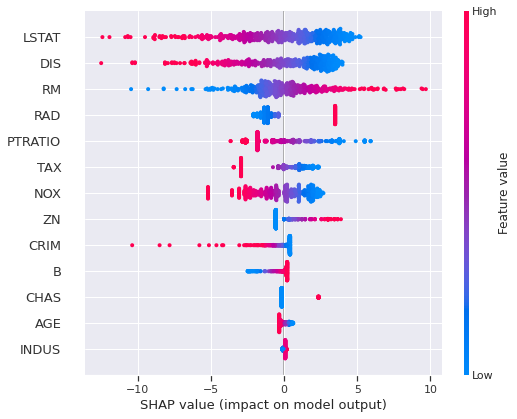

In [ ]:
shap.plots.beeswarm(shap_values, max_display=14)

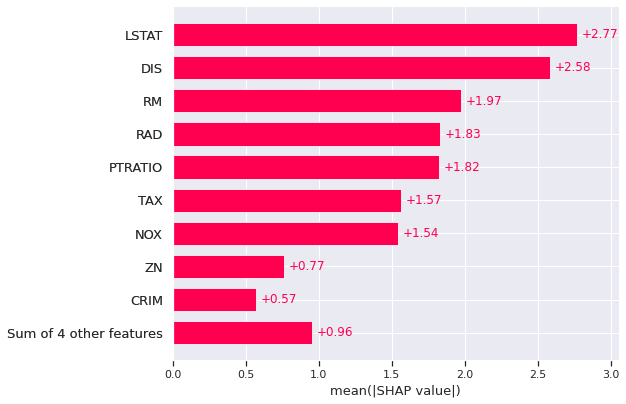

In [ ]:
shap.plots.bar(shap_values)

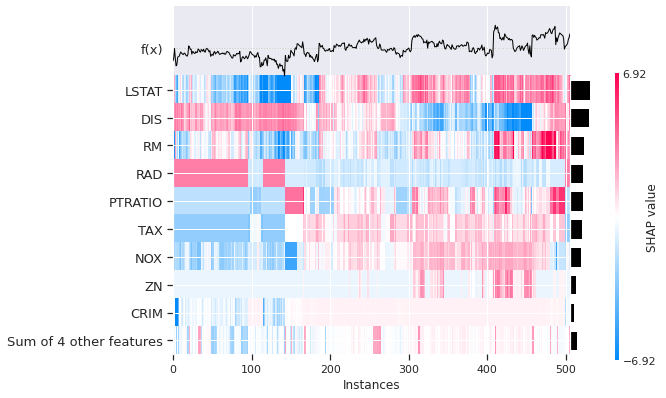

In [ ]:
shap.plots.heatmap(shap_values[:1000])



[03:33:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:33:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:33:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:33:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:33:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:33:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:33:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:33:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

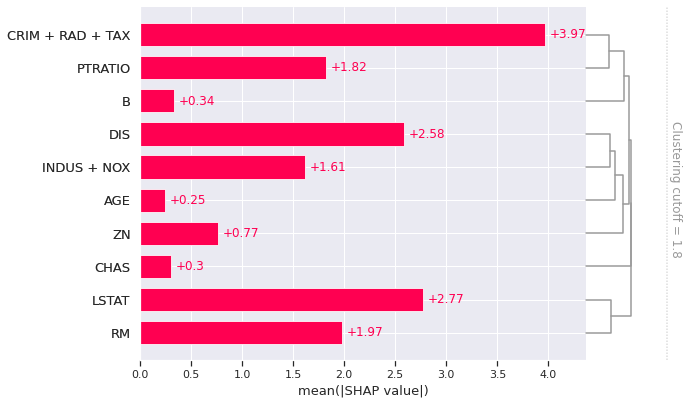

In [ ]:
clustering = shap.utils.hclust(X, y)
shap.plots.bar(shap_values, clustering=clustering, clustering_cutoff=1.8)


In [ ]:
# clustering = shap.utils.hclust(X_test, y_test)
shap.initjs()
shap.plots.force(shap_values[0])
# shap.plots.scatter(shap_values[:,"Age"])

In [ ]:
explainer = shap.KernelExplainer(model.predict,X_train)
shap_values = explainer.shap_values(X_train)

Using 354 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [ ]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0.0,0.460,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34
371,9.23230,0.0,18.10,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53
219,0.11425,0.0,13.89,1.0,0.550,6.373,92.4,3.3633,5.0,276.0,16.4,393.74,10.50
403,24.80170,0.0,18.10,0.0,0.693,5.349,96.0,1.7028,24.0,666.0,20.2,396.90,19.77
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
428,7.36711,0.0,18.10,0.0,0.679,6.193,78.1,1.9356,24.0,666.0,20.2,96.73,21.52
385,16.81180,0.0,18.10,0.0,0.700,5.277,98.1,1.4261,24.0,666.0,20.2,396.90,30.81
308,0.49298,0.0,9.90,0.0,0.544,6.635,82.5,3.3175,4.0,304.0,18.4,396.90,4.54


In [ ]:
X_test.iloc[0,:]

CRIM         0.06724
ZN           0.00000
INDUS        3.24000
CHAS         0.00000
NOX          0.46000
RM           6.33300
AGE         17.20000
DIS          5.21460
RAD          4.00000
TAX        430.00000
PTRATIO     16.90000
B          375.21000
LSTAT        7.34000
Name: 329, dtype: float64

In [ ]:
explainer_kernel = shap.KernelExplainer(model.predict, X100)


In [ ]:
shap_values_kernel = explainer_kernel.shap_values(X_test.iloc[0,:])

In [ ]:
base_value = explainer_kernel.expected_value
base_value

22.743390308847246

In [ ]:
shap_values_kernel

array([ 0.41559319, -0.55382933, -0.0826027 , -0.15067479,  1.48012795,
        0.25153405,  0.50042655, -2.11909025, -1.34873911, -0.31952673,
        1.54596626,  0.06905984,  2.50407265])

In [ ]:
shap.initjs()
shap.force_plot(explainer_kernel.expected_value, shap_values_kernel, X_test.iloc[0,:])

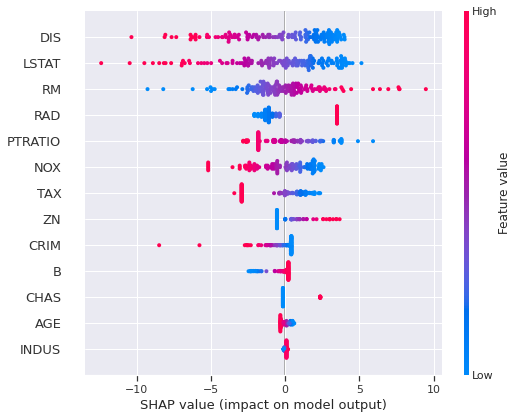

In [ ]:
shap_values_all = explainer_kernel.shap_values(X_test)
shap.summary_plot(shap_values_all, X_test)

In [ ]:
shap.initjs()
shap.plots.force(explainer_kernel.expected_value,shap_values_all,X_test)